### Rating Prediction Using Linear Regression

The goal of this project is to predict book rating working with Goodreads data. I will try to understand the important factors that make a book more popular/likeable. 

Workflow:

    1.Data Exploration
    2.Data Cleaning
    3.Data Visualization
    4.Data Preprocessing
    5.Machine Learning Model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
%matplotlib inline
sns.set(style = "whitegrid")
sns.set_palette('deep')

### Data Exploration

In [3]:
data = pd.read_csv('books.csv', on_bad_lines='warn')




Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



### Data Exploration

In [4]:
data.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### Data Cleaning

Fixing num_pages variable name so it has no blank spaces

In [6]:
data.rename(columns={"  num_pages":"num_pages"}, inplace = True)

Cheking duplicated data and missing values

In [7]:
data.duplicated().any()

False

<Axes: >

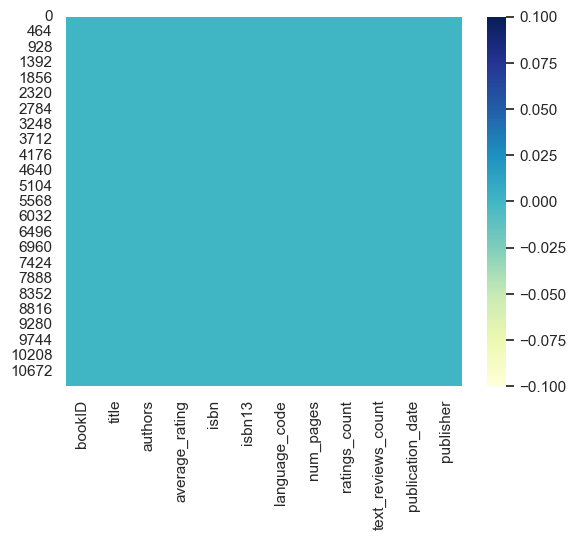

In [8]:
data.isna().any()
sns.heatmap(data.isna(), cmap = 'YlGnBu')

We know we have no duplicated or missing values. Let's move on to Data Viz

### Data Visualization

#### Let's focus first on our target variable: Rating

Text(0, 0.5, 'Frecuency')

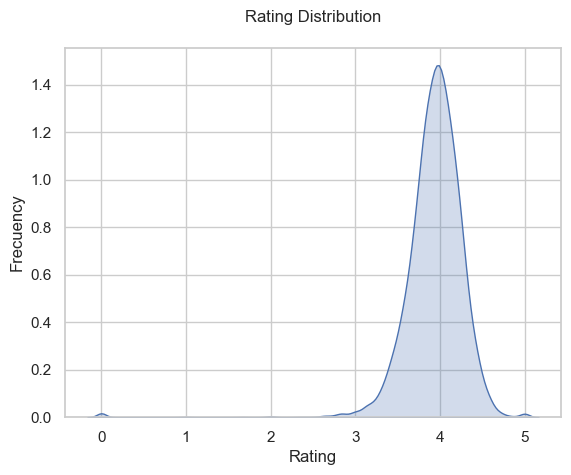

In [9]:
sns.kdeplot(data['average_rating'], fill = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frecuency')

We can appreciate that most of our dataset book ratings are arround 4

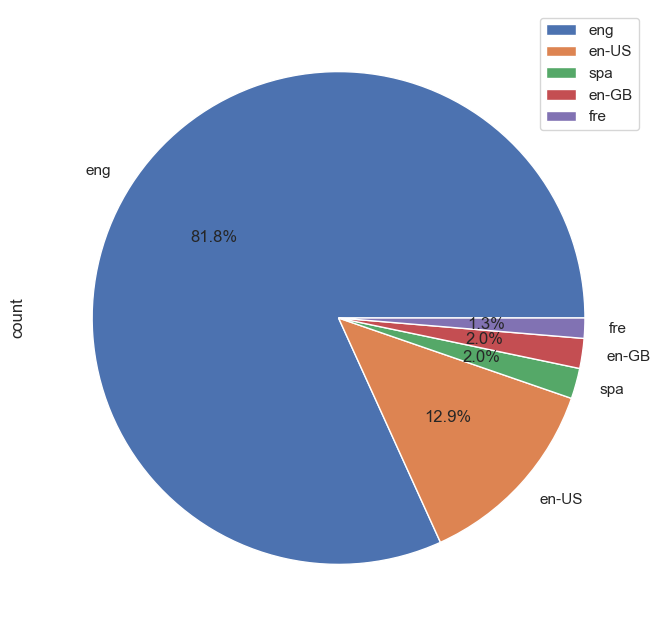

In [10]:
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8,8)).legend()

We find that the top5 most common languages are English(generic), English(USA), Spanish, English(GB) and French. This means that over 95% of books are in english.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.92'),
  Text(4, 0, '3.93'),
  Text(5, 0, '3.94'),
  Text(6, 0, '3.96'),
  Text(7, 0, '3.97'),
  Text(8, 0, '3.98'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

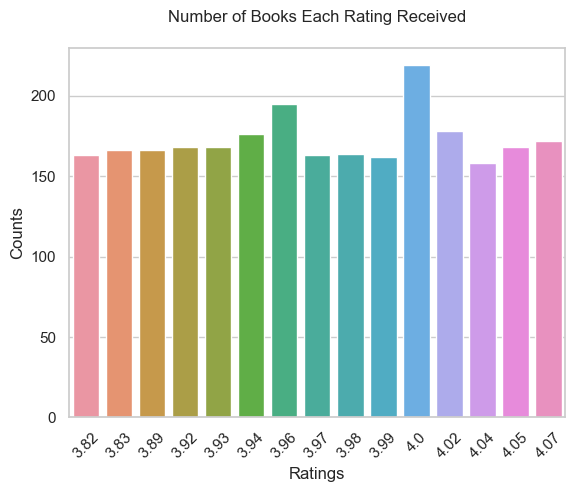

In [11]:
#number of books per rating, for 15 most common ratings
ratings = data['average_rating'].value_counts().head(15)
sns.barplot(x=ratings.index, y=ratings.values)
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)


#### Let's see which are the books with more ratings

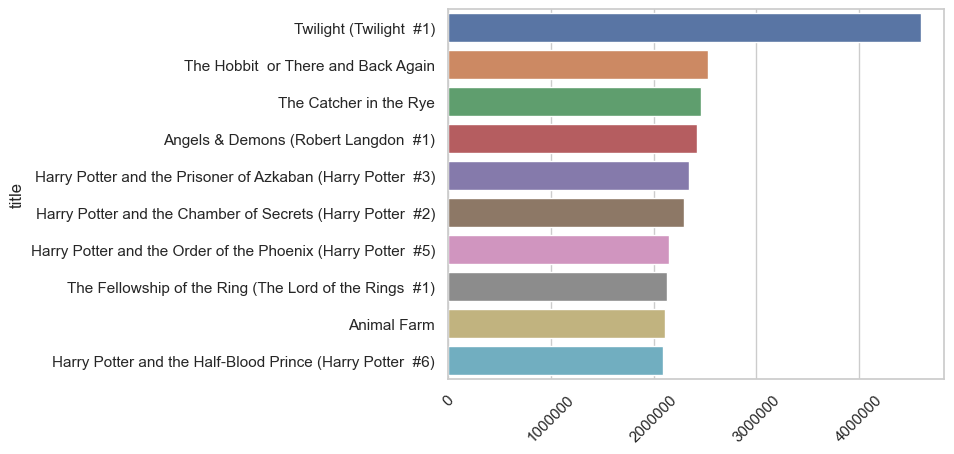

In [12]:
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(x=popular_books.values, y=popular_books.index)
plt.xticks(rotation=45)
# Changing scientific notation from X axis
ax = plt.gca()

ax.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()


#popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
#sns.barplot(x=popular_books, y=popular_books.index)

#### And now which are the books with more reviews

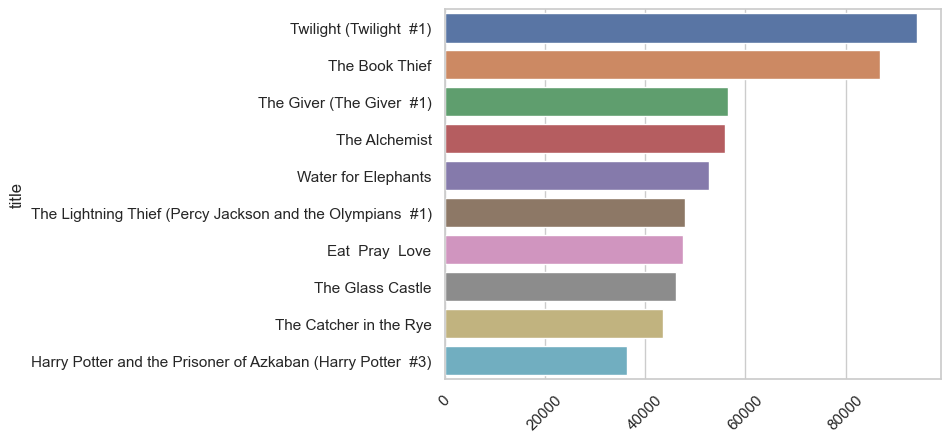

In [13]:
most_reviewed_books = data.nlargest(10,['text_reviews_count']).set_index('title')["text_reviews_count"]
sns.barplot(x=most_reviewed_books.values, y=most_reviewed_books.index)
plt.xticks(rotation=45)
ax = plt.gca()

ax.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()

#### Let's look for the top rated books with less than 200 pages for book lovers who have little time

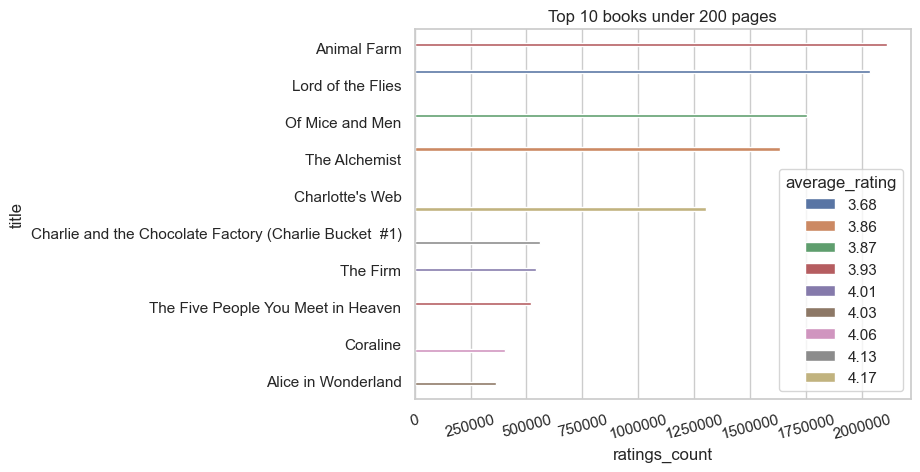

In [14]:
under200 = data[data['num_pages']<=200]
under200top10 = under200.nlargest(10,["ratings_count"])
sns.barplot(x=under200top10["ratings_count"], y=under200top10["title"], hue=under200top10['average_rating'])
plt.title("Top 10 books under 200 pages")
plt.xticks(rotation=15)

ax=plt.gca()
ax.ticklabel_format(style='plain',axis='x',useOffset=False)

#### Now looking for the 10 longest books

Text(0.5, 1.0, '10 longest books')

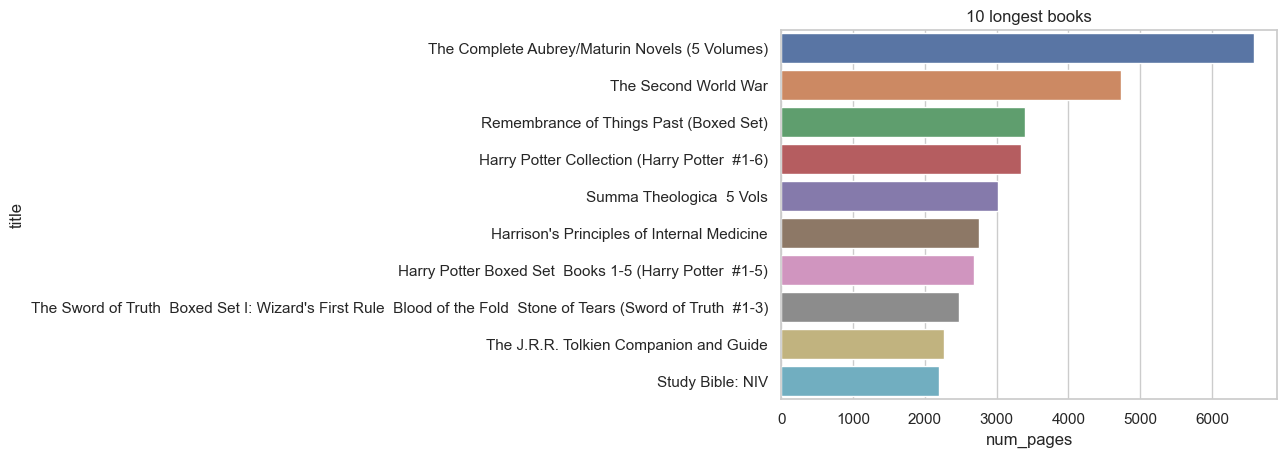

In [15]:
top_longest_books = data.nlargest(10, ["num_pages"]).set_index("title")
sns.barplot(x=top_longest_books["num_pages"],y=top_longest_books.index)
plt.title("10 longest books")

#### Looking for the most published books

Text(0.5, 0, 'Number of publications')

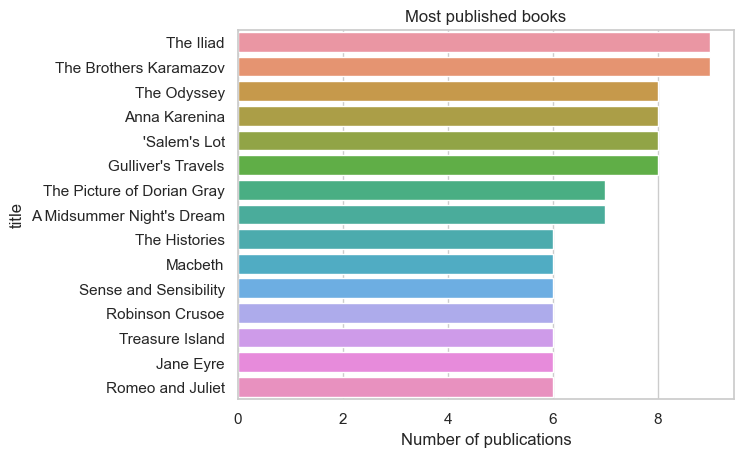

In [16]:
sns.barplot(x=data['title'].value_counts()[:15], y=data['title'].value_counts().index[:15])
plt.title("Most published books")
plt.xlabel("Number of publications")

#### Looking for the authors of top10 most rated books

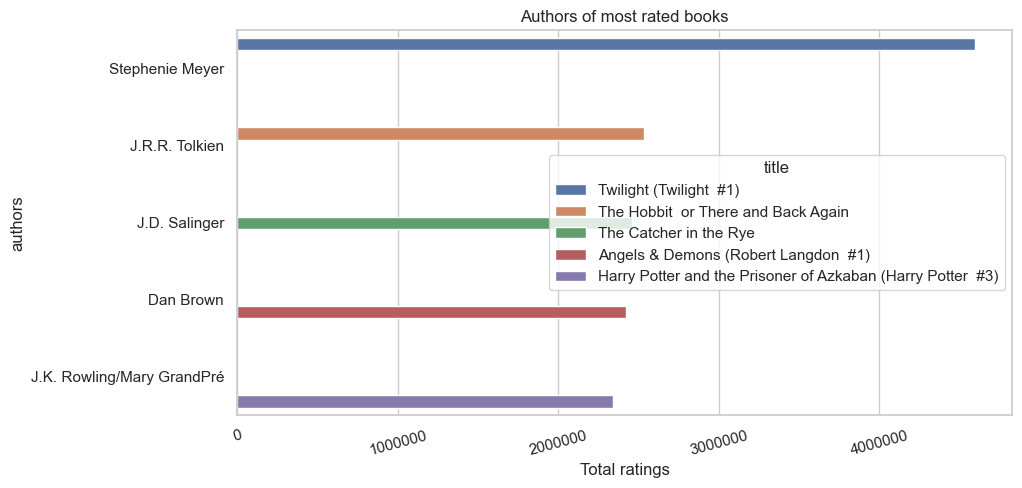

In [17]:
authors = data.nlargest(5,['ratings_count']).set_index('authors')
plt.figure(figsize=(10,5))
sns.barplot(x = authors['ratings_count'], y = authors.index, errorbar = None, hue = authors['title'])
plt.xlabel('Total ratings')
plt.title("Authors of most rated books")
plt.xticks(rotation = 15)

ax = plt.gca()
ax.ticklabel_format(style = 'plain', axis = "x", useOffset = False)


#### Authors with more publications

Text(0.5, 0, 'Number of publications')

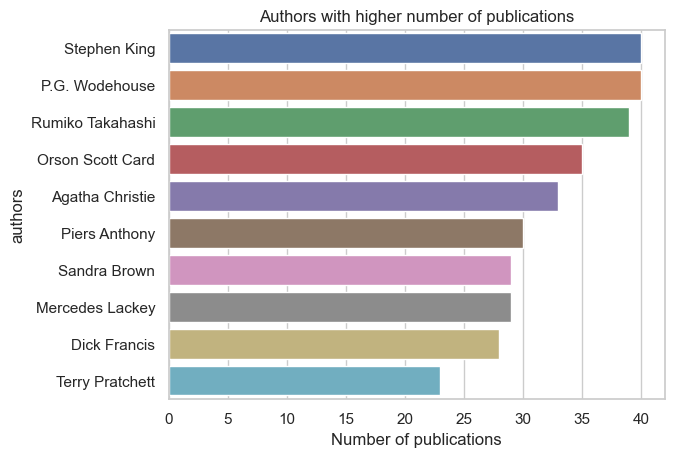

In [18]:
author_publications = data['authors'].value_counts().head(10)
sns.barplot(x=author_publications, y=author_publications.index)
plt.title('Authors with higher number of publications')
plt.xlabel("Number of publications")

#### Bivariant distributions between ratings and number of pages

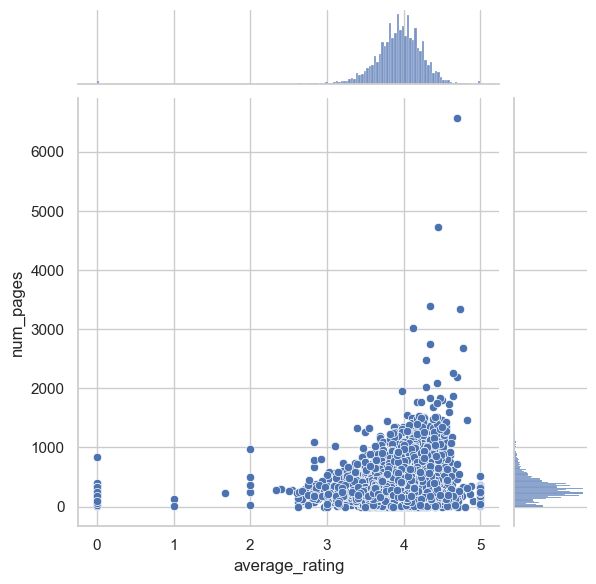

In [19]:
sns.jointplot(x = 'average_rating', y = 'num_pages', data = data)

We can see that there is a concentration of higher rates (>3) when the books have less than 1500 pages, and that all books rated with a 5 have less than 1000 pages. Most of the books have a rating higher than 3 and are shorter than 2000 pages.

It is important to note that we have some outliers which should be addressed, such as books with more than 2000 pages. We also have some anomalies on ratings, scores of 0 or 1.

#### Bivariant distributions between ratings and number of reviews

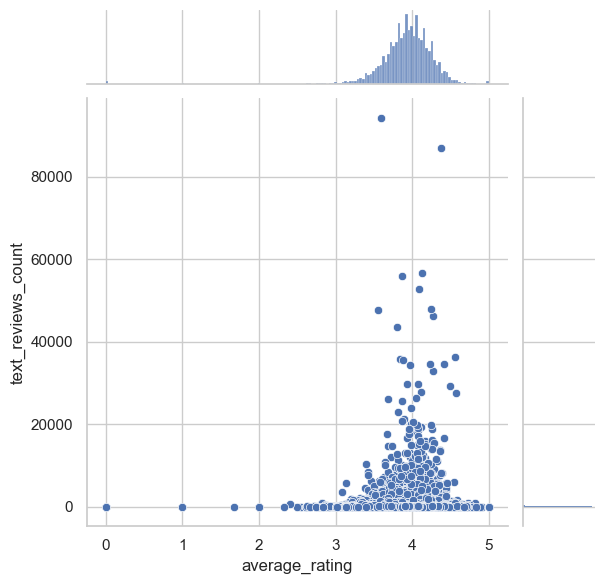

In [20]:
sns.jointplot (x = 'average_rating', y = 'text_reviews_count', data = data)

We see that most books have less than 20000 reviews. Most books with high ratings(<3) have less than 20000 reviews. We have outliers again, which should be addressed.

# Data Preprocessing

### 1-Outliers

Removing extreme outliers, aiming for a better accuracy of our model

#### Number of pages

<Axes: xlabel='num_pages'>

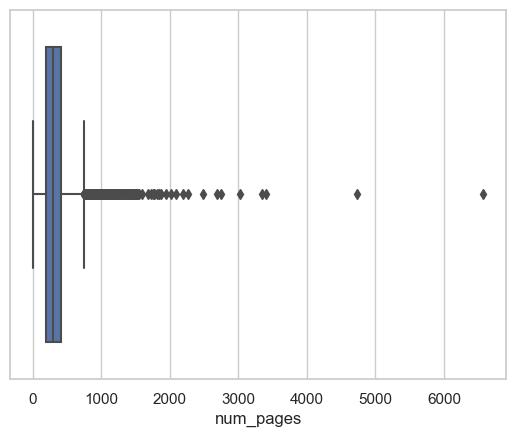

In [21]:
sns.boxplot(x=data['num_pages'])

In [22]:
Q1 = data['num_pages'].quantile(0.25)
Q3 = data['num_pages'].quantile(0.75)
IQR = Q3 - Q1

Upper_limit = Q3 + 1.5 * IQR

print(f'Upper Limit for Outliers: {Upper_limit}')


Upper Limit for Outliers: 752.0


I will consider points from 1000 to +6000 as outliers that will not be included in further steps of our model.

In [23]:
#removing outleirs from number of pages

In [24]:
data = data.drop(data.index[data['num_pages'] >= 800])

#### Ratings count

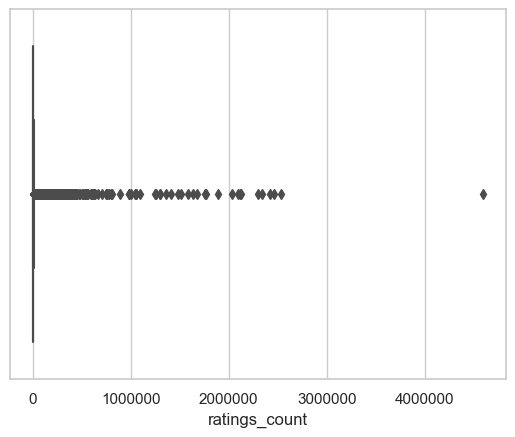

In [25]:
sns.boxplot(x=data['ratings_count'])
ax=plt.gca()
ax.ticklabel_format(style = 'plain', axis = 'x', useOffset = False)


In [26]:
Q1= data['ratings_count'].quantile(0.25)
Q3= data['ratings_count'].quantile(0.75)
IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
print(f'Upper limit for Outliers: {Upper_limit}')

Upper limit for Outliers: 12179.0


Values of ratings_count higer than 17700 will be considered as outliers and will not be included in further steps of the model

In [27]:
data = data.drop(data.index[data['ratings_count'] >= 1000000])

#### Number of reviews

<Axes: xlabel='text_reviews_count'>

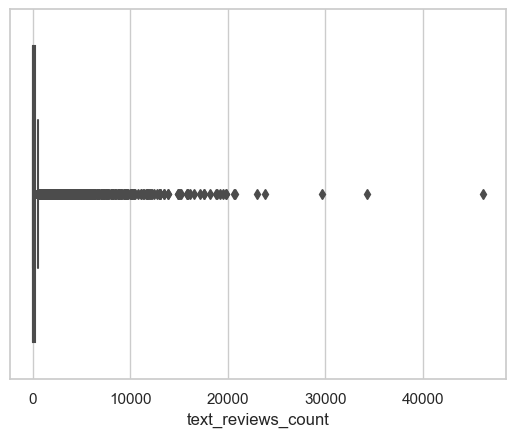

In [28]:
sns.boxplot(x = data['text_reviews_count'])

In [29]:
Q1 = data["text_reviews_count"].quantile(0.25)
Q3 = data["text_reviews_count"].quantile(0.75)
IQR = Q3 - Q1

Upper_limit = Q3 + 1.5*IQR
print(f'Upper limit for outliers: {Upper_limit}')


Upper limit for outliers: 566.5


Values of text reviews higer than 20000 will be considered as outliers and will not be included in further steps of the model

In [30]:
data = data.drop(data.index[data["text_reviews_count"] >= 20000])

### 2-Feature engineering

Objective: selecting and transforming variables when creating a predictive model. Many algorithms require numerical inputs, and categorical features must be transformed in orther to be used in such algorithms.

    Enconding of:
    -title
    -author
    -language
    

#### Enconding title variable

In [31]:
le = preprocessing.LabelEncoder()
data['title']=le.fit_transform(data['title'])
data['title'].head(5)

2     2956
5     9318
9     7509
10    7509
12     284
Name: title, dtype: int32

#### Enconding author variable

In [32]:
data['authors'] = le.fit_transform(data['authors'])
data['authors'].head(5)

2     2536
5     6095
9     1426
10    1431
12     594
Name: authors, dtype: int32

#### Enconding language variable

In [33]:
encoded_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, encoded_lang], axis = 1)

# Machine Learning Model

Here we create the actual model for predicting book ratings with Linear regression, a basic method.

For this first model:
As predictors(independent variables), we are going to use all our variables except publication_date, publisher, isbn, language_code(which is one-hot encoded) and our target variable: average_rating.

Our dependent variable, our output variable, is average_rating.

##### Creating our input and output

In [34]:
X = data.drop(['average_rating',"language_code","isbn","publication_date", "publisher" ], axis=1)
y = data['average_rating']

#### Dividing our dataset in training and test sets at 80-20 ratio

In [35]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 10)

#### Importing and training our model

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
print("Coefs: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefs:  [-8.11611354e-07  1.53897371e-06  2.55050846e-06  2.26327966e-15
  1.56537844e-04  4.31906166e-07 -4.32630805e-06  5.15347216e-01
 -3.19644615e-01  1.34148930e-01  6.61923760e-02  6.79184794e-02
  8.80916555e-02  7.58114541e-02  1.38719114e-01  1.00380487e-01
 -1.68259024e-03 -5.40875009e-01 -1.06010179e-01  2.32784411e-01
  4.51189824e-01  5.34397658e-01  2.08606925e-01  2.47288479e-01
  2.47454097e-01 -2.06713317e-01  1.30890862e-01  3.96214182e-01
  8.20380442e-02 -3.83199068e+00  7.04036928e-02  5.90538001e-01
  0.00000000e+00  6.35031091e-01]
Intercept:  3.7669157077861675


#### Checking model accuracy with our test data

Passing the test data to our model to make predictions

In [38]:
predictions = lr.predict(X_test)


Now we want to compare the actual scores of our train set(y_test) with the predicted values

In [39]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.19,3.999199
1,4.36,3.901520
2,3.57,3.858762
3,3.97,3.878762
4,4.31,3.932706
5,3.94,3.921617
6,4.24,4.110444
7,4.16,3.846163
8,3.69,3.968261
9,4.16,3.890900


Visualizing these comparision:

<Axes: >

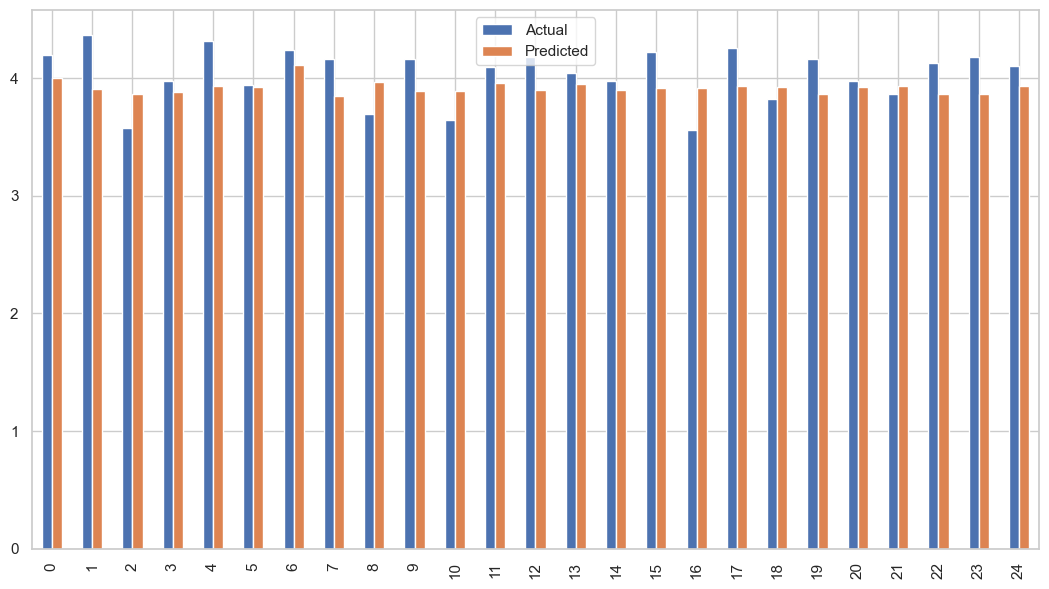

In [40]:
pred.plot(kind='bar', figsize=(13,7))

#### Evaluating the performance of the model

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 0.2278984758729909
RMSE: 0.3521007412985623
MSE: 0.12397493202299709
R2: 0.015434967002269095


## Conlcusions - Model 1

Given that average_rating is in a scale from 0 to 5, a MAE of 0.228 could be considered relatively small. A RMSE of 0.35 in this context might be considered moderate. A MSE of 0.12 could also be considered relatively small. An R-squared of 0.015 means that this model is only explaining a 1.5% of the variability in the data.

In conclusion, then, while the model's predictions are relatively close to the actual values, it doesn't explain much of the variability in the data. Next, we will consider trying different models, adding more features that were left behind for the first model.

# MODEL 2

### Feature engineering for model 2

We will encode publisher and use month and year from publication_date and include them as part of the predictor variables.

In [42]:
data['publisher'] = le.fit_transform(data['publisher'])
data['publisher'].head(5)

2     1735
5     1336
9      460
10    1619
12     319
Name: publisher, dtype: int32

In [43]:
# Convert publication_date to datetime

data['publication_date'] = pd.to_datetime(data['publication_date'], errors='coerce')

# Extract year and month
data['year'] = data['publication_date'].dt.year
data['month'] = data['publication_date'].dt.month


In [44]:
na_count_year = data['year'].isna().sum()
na_count_month = data['month'].isna().sum()
print(na_count_year)
print(na_count_month)

2
2


In [45]:
data = data.dropna(subset=['year'])
data = data.dropna(subset=['month'])


#### Setting our second model

In [46]:
X2 = data.drop(['average_rating',"language_code","isbn","isbn13","publication_date","bookID"], axis=1)
y = data['average_rating']

In [47]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20, random_state = 10)

In [48]:
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)

LinearRegression()

In [49]:
predictions2 = lr2.predict(X2_test)

In [50]:
pred2 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions2.tolist()}).head(25)
pred2.head(10)

,Actual,Predicted
0,4.19,3.988264
1,4.10,3.910241
2,3.57,3.864898
3,3.97,3.888713
4,4.31,3.961858
5,3.51,3.881197
6,4.35,3.925347
7,4.17,3.932507
8,3.69,3.965050
9,4.16,3.879154


<Axes: >

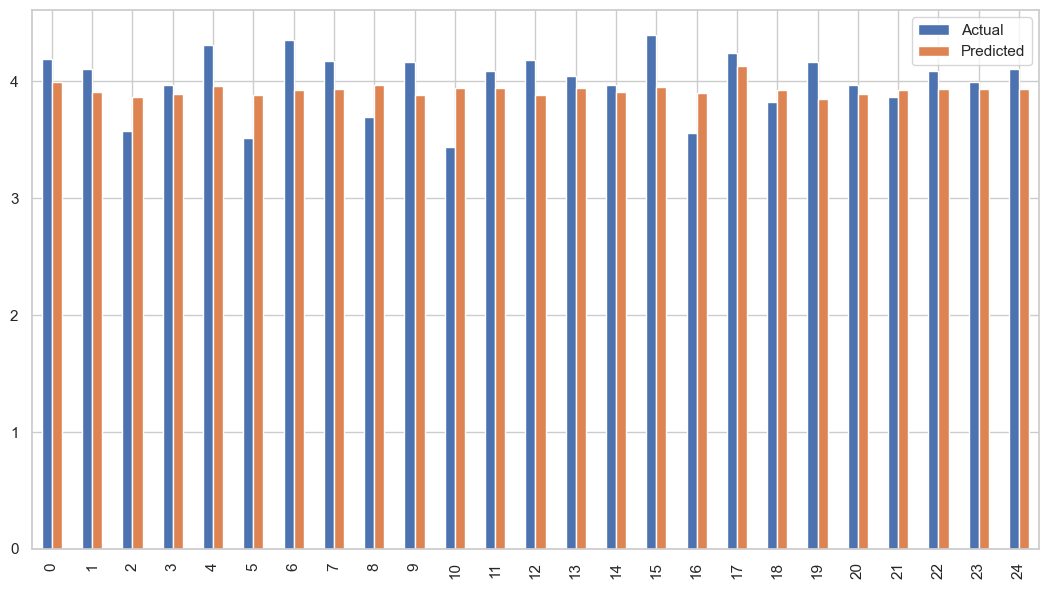

In [51]:
pred2.plot(kind='bar', figsize=(13,7))

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('R2:', metrics.r2_score(y_test, predictions2))

MAE: 0.23129644236258162
RMSE: 0.35867213809658754
MSE: 0.12864570264677755
R2: 0.015844988393436843


# CONCLUSIONS

The modifications applied have not improved significantly our model. It would be interesting to add more information, such as genre, awards, or separating the authors for those books that have more than 1 writer 